In [1]:

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
import sys
sys.path.append('./lib')
from lib.cleaning import *
from lib.data_prepration import *
from lib.paralellism import *
from lib.mydoc2vec import *
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import nltk

from gensim.models import Doc2Vec
from collections import namedtuple
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
#!pip install scipy==1.12
SEED = 448

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
"""
!pip install pandarallel
!pip install nltk 
!python.exe -m pip install --upgrade pip
!pip install gensim
!pip install scipy==1.12 --upgrade"""

In [ ]:
"""file_path = '../data/book_review.csv'
data_prep = DataPreparation(file_path)
data_prep.clean_and_preprocess(True)
data_prep.Normalize()
data_prep.data=data_prep.data[keep_cols]

data_prep.data=data_prep.data.sample(frac=0.3,random_state=SEED)"""

In [2]:


keep_cols=['title', 'price', 'helpfulness', 'score', 'time',
       'summary', 'text', 'description', 'authors', 'publisher',
       'publisheddate', 'categories', 'ratingscount']
file_path = '../data/one_half.csv'
data_prep = DataPreparation(file_path)
data_prep.read_large_csv()
random.seed(SEED)

data_prep.data=data_prep.data[keep_cols]
data_prep.data

,title,price,helpfulness,score,time,summary,text,description,authors,publisher,publisheddate,categories,ratingscount
0,parenthood by proxy: don't have them if you wo...,21.762656,0.833333,5.0,2000-05-17,love it or hate it,the bottom line is that you are either going t...,entreats parents to involve themselves in thei...,['Laura Schlessinger'],dr. laura schlessinger,2000-04-26,['Family & Relationships'],272.064662
1,old possum's book of practical cats,21.762656,NaN,5.0,2010-02-17,ryming poetry rules!,t.s. eliot proves with old possum's book of pr...,t. s. eliot's playful cat poems were originall...,['Thomas Stearns Eliot'],houghton mifflin harcourt,1996-04-01,['Juvenile Nonfiction'],6.000000
2,the naked sun.,21.762656,0.600000,5.0,2004-08-09,space detective,asimov brings back new york detective elijah b...,"a millennium into the future, two advancements...",['Isaac Asimov'],spectra,2011-04-13,['Fiction'],37.000000
3,hunger of memory: the education of richard rod...,21.762656,0.250000,3.0,1998-10-01,was able to relate to author,there were times in the book where rodriguez w...,hunger of memory is the story of mexican-ameri...,['Richard Rodriguez'],bantam,2004-02-03,['Biography & Autobiography'],11.000000
4,brazilian adventure,21.762656,1.000000,4.0,2000-03-27,funny exciting travel,imagine a book co-written by redmond o'hanlon ...,"in 1932 peter fleming, a literary editor, enga...",['Peter Fleming'],northwestern university press,2009-09-17,['Biography & Autobiography'],5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707927,the will of the empress,3.590000,0.571429,2.0,2006-03-09,very poor (spoilers!),"as others have indicated, this book features t...",for years the empress of namorn has pressed he...,['Tamora Pierce'],NaN,2001-04-09,['Juvenile Fiction'],28.000000
707928,the lord of the rings (3 volume set),21.762656,0.921569,3.0,1999-12-27,specifically about the &quot;millennium editio...,"this is not a review of lotr: it is, rather, s...","a saga of dwarfs and elves, goblins and trolls...",['J. R. R. Tolkien'],NaN,2013-10-15,"['Baggins, Bilbo (Fictitious character)']",704.000000
707929,the hitchhiker's guide to the galaxy,21.762656,NaN,5.0,1999-03-27,"thhgttg is humorous, witty, enlightening and fun!",reading this book was very entertaining. the w...,the off-beat and occasionally extraterrestrial...,['Douglas Adams'],harmony,1995-01-01,['Science'],2.000000
707930,the wapshot chronicle,21.762656,0.666667,4.0,2006-12-13,"unique story, quick read",this is one of those books that follows the li...,national book award winner • pulitzer prize wi...,['John Cheever'],vintage,2021-02-02,['Fiction'],4.000000


In [3]:
data_prep.data.columns

Index(['title', 'price', 'helpfulness', 'score', 'time', 'summary', 'text',
       'description', 'authors', 'publisher', 'publisheddate', 'categories',
       'ratingscount'],
      dtype='object')

In [4]:
len(data_prep.data)

707932

In [5]:
print(len(data_prep.data))
print(data_prep.data.info())
print(data_prep.data.describe())

707932
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707932 entries, 0 to 707931
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   title          707932 non-null  object 
 1   price          707932 non-null  float64
 2   helpfulness    497658 non-null  float64
 3   score          707932 non-null  float64
 4   time           707932 non-null  object 
 5   summary        707844 non-null  object 
 6   text           707932 non-null  object 
 7   description    707932 non-null  object 
 8   authors        707932 non-null  object 
 9   publisher      642279 non-null  object 
 10  publisheddate  707932 non-null  object 
 11  categories     707932 non-null  object 
 12  ratingscount   707932 non-null  float64
dtypes: float64(4), object(9)
memory usage: 70.2+ MB
None
               price    helpfulness          score   ratingscount
count  707932.000000  497658.000000  707932.000000  707932.000000
mean       21.629

In [6]:
data_prep.data.isnull().sum()

title                 0
price                 0
helpfulness      210274
score                 0
time                  0
summary              88
text                  0
description           0
authors               0
publisher         65653
publisheddate         0
categories            0
ratingscount          0
dtype: int64

In [7]:
data_prep.data.score.value_counts()

score
5.0    426130
4.0    137912
3.0     60128
1.0     47629
2.0     36133
Name: count, dtype: int64

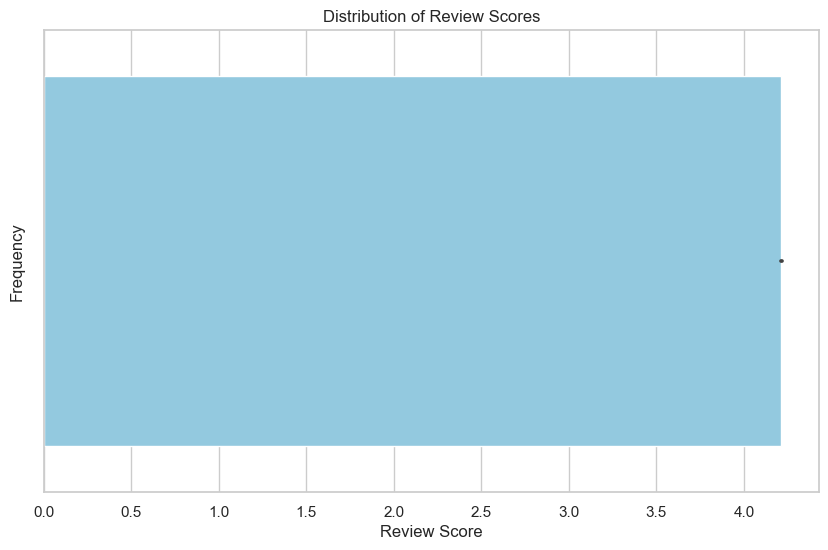

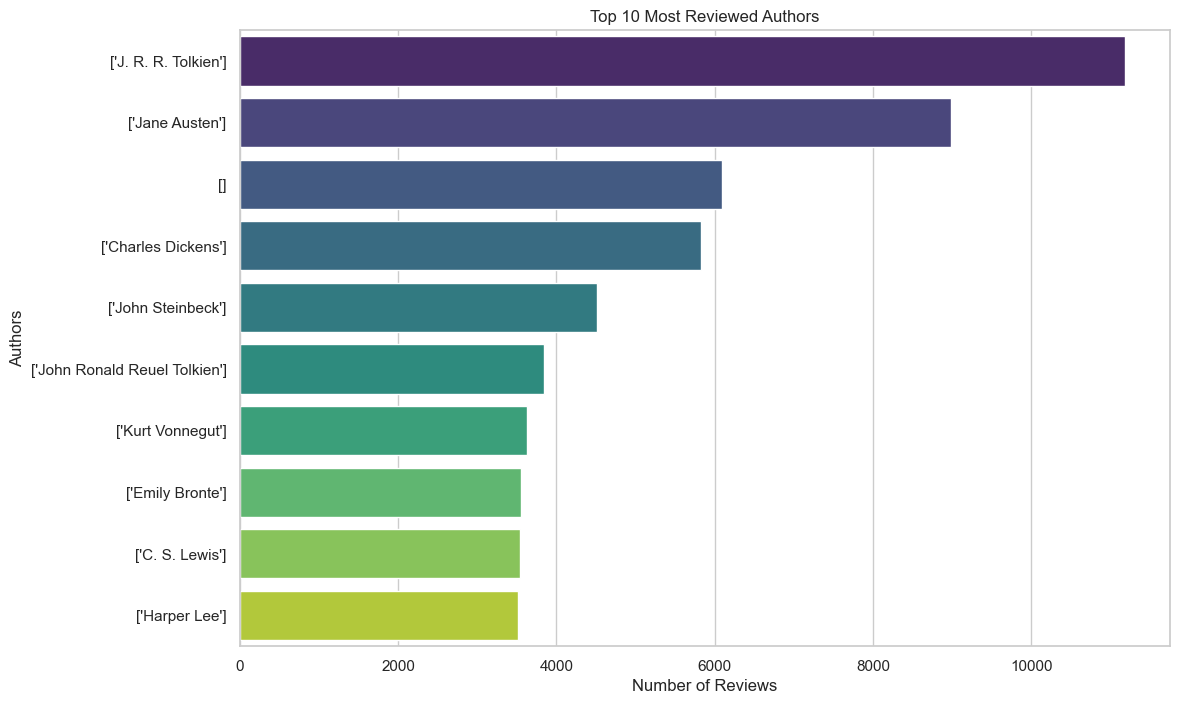

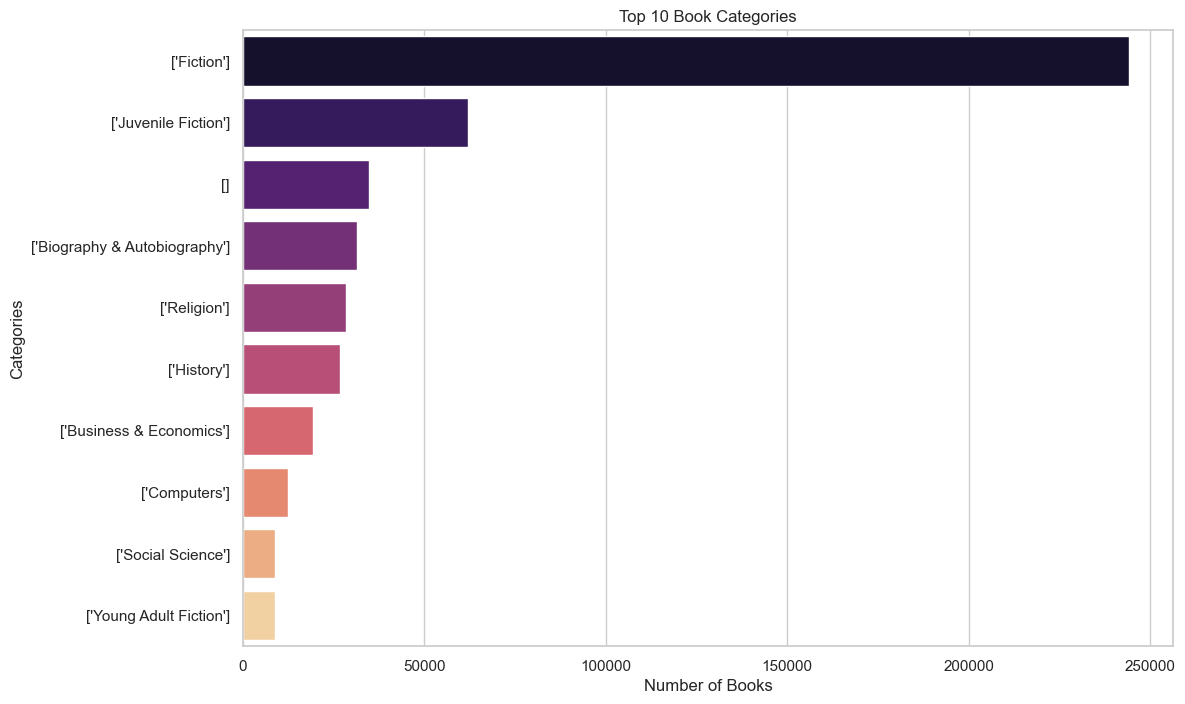

In [8]:
data_prep.generate_plots()

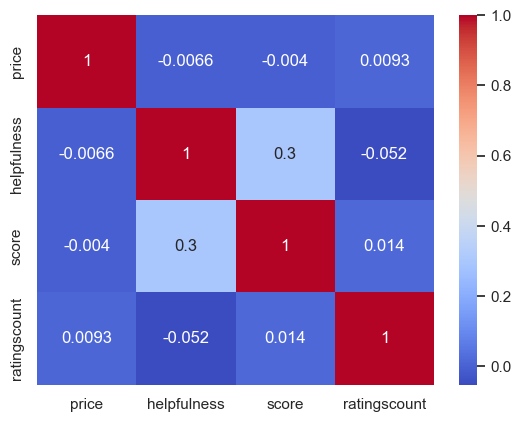

In [9]:
corr_matrix = data_prep.data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
join_func = lambda x: ', '.join(map(str, x))
data_prep.data['all']=data_prep.data['title'] + data_prep.data['description'] + data_prep.data['authors'].apply(join_func)+data_prep.data['categories'].apply(join_func)
data_prep.data['all']


0         parenthood by proxy: don't have them if you wo...
1         old possum's book of practical catst. s. eliot...
2         the naked sun.a millennium into the future, tw...
3         hunger of memory: the education of richard rod...
4         brazilian adventurein 1932 peter fleming, a li...
                                ...                        
707927    the will of the empressfor years the empress o...
707928    the lord of the rings (3 volume set)a saga of ...
707929    the hitchhiker's guide to the galaxythe off-be...
707930    the wapshot chroniclenational book award winne...
707931    the merck manual of medical information: 2nd h...
Name: all, Length: 707932, dtype: object

In [11]:

_doc2vec = Doc2VecRecommender()
testdata=_doc2vec.train(data_prep.data)


In [12]:
_doc2vec.model.save("./models/doc2vec_model_hole")

In [13]:
_doc2vec_load = Doc2VecRecommender(data_prep.data)
_doc2vec_load.load_model('./models/doc2vec_model_hole')


In [14]:
search='after ice age a lion king is back'
_doc2vec_load.recommend_by_text(search) 

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [15]:
data_prep.data=data_prep.data.reset_index()
data_prep.data

,index,title,price,helpfulness,score,time,summary,text,description,authors,publisher,publisheddate,categories,ratingscount,all
0,0,parenthood by proxy: don't have them if you wo...,21.762656,0.833333,5.0,2000-05-17,love it or hate it,the bottom line is that you are either going t...,entreats parents to involve themselves in thei...,['Laura Schlessinger'],dr. laura schlessinger,2000-04-26,['Family & Relationships'],272.064662,parenthood by proxy: don't have them if you wo...
1,1,old possum's book of practical cats,21.762656,NaN,5.0,2010-02-17,ryming poetry rules!,t.s. eliot proves with old possum's book of pr...,t. s. eliot's playful cat poems were originall...,['Thomas Stearns Eliot'],houghton mifflin harcourt,1996-04-01,['Juvenile Nonfiction'],6.000000,old possum's book of practical catst. s. eliot...
2,2,the naked sun.,21.762656,0.600000,5.0,2004-08-09,space detective,asimov brings back new york detective elijah b...,"a millennium into the future, two advancements...",['Isaac Asimov'],spectra,2011-04-13,['Fiction'],37.000000,"the naked sun.a millennium into the future, tw..."
3,3,hunger of memory: the education of richard rod...,21.762656,0.250000,3.0,1998-10-01,was able to relate to author,there were times in the book where rodriguez w...,hunger of memory is the story of mexican-ameri...,['Richard Rodriguez'],bantam,2004-02-03,['Biography & Autobiography'],11.000000,hunger of memory: the education of richard rod...
4,4,brazilian adventure,21.762656,1.000000,4.0,2000-03-27,funny exciting travel,imagine a book co-written by redmond o'hanlon ...,"in 1932 peter fleming, a literary editor, enga...",['Peter Fleming'],northwestern university press,2009-09-17,['Biography & Autobiography'],5.000000,"brazilian adventurein 1932 peter fleming, a li..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707927,707927,the will of the empress,3.590000,0.571429,2.0,2006-03-09,very poor (spoilers!),"as others have indicated, this book features t...",for years the empress of namorn has pressed he...,['Tamora Pierce'],NaN,2001-04-09,['Juvenile Fiction'],28.000000,the will of the empressfor years the empress o...
707928,707928,the lord of the rings (3 volume set),21.762656,0.921569,3.0,1999-12-27,specifically about the &quot;millennium editio...,"this is not a review of lotr: it is, rather, s...","a saga of dwarfs and elves, goblins and trolls...",['J. R. R. Tolkien'],NaN,2013-10-15,"['Baggins, Bilbo (Fictitious character)']",704.000000,the lord of the rings (3 volume set)a saga of ...
707929,707929,the hitchhiker's guide to the galaxy,21.762656,NaN,5.0,1999-03-27,"thhgttg is humorous, witty, enlightening and fun!",reading this book was very entertaining. the w...,the off-beat and occasionally extraterrestrial...,['Douglas Adams'],harmony,1995-01-01,['Science'],2.000000,the hitchhiker's guide to the galaxythe off-be...
707930,707930,the wapshot chronicle,21.762656,0.666667,4.0,2006-12-13,"unique story, quick read",this is one of those books that follows the li...,national book award winner • pulitzer prize wi...,['John Cheever'],vintage,2021-02-02,['Fiction'],4.000000,the wapshot chroniclenational book award winne...


In [ ]:
data_prep.data.to_csv('../data/cleared_columns.csv')

In [42]:
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('wordnet')
def preprocess(sentence,lemmatizer,stop_words_temp=stop_words):
    
    tokens = nltk.word_tokenize(sentence,language='english')
    tokens=[word for word in tokens if word not in stop_words_temp]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

lemmatizer = WordNetLemmatizer()

documents = [TaggedDocument(preprocess(doc,lemmatizer), [i]) for i, doc in enumerate(data_prep.data['all'])]
def filter_strings_by_length(lst):
    return [item for item in lst if len(item) > 2]
dts=[','.join(filter_strings_by_length(d.words)) for d in documents]
data_prep.data['all_clear']=dts


[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
data_prep.data['all_clear']

0         parenthood,proxy,n't,n't,raise,thementreats,pa...
1         old,possum,book,practical,catst,eliot,playful,...
2         naked,sun.a,millennium,future,two,advancement,...
3         hunger,memory,education,richard,rodriguezhunge...
4         brazilian,adventurein,1932,peter,fleming,liter...
                                ...                        
707927    empressfor,year,empress,namorn,pressed,young,c...
707928    lord,ring,volume,set,saga,dwarf,elf,goblin,tro...
707929    hitchhiker,guide,galaxythe,off-beat,occasional...
707930    wapshot,chroniclenational,book,award,winner,pu...
707931    merck,manual,medical,information,2nd,home,edit...
Name: all_clear, Length: 707932, dtype: object

In [44]:
data_prep.data.to_csv('../data/cleared_columns.csv')